Load Dataset to Colab


In [2]:
import pandas as pd

# Load the CSV (if uploaded manually)
df = pd.read_csv('/content/winequality-red.csv')

# Show first few rows
df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Missing Value Handling

In [3]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [4]:
# Count zero values in each column
zero_counts = (df == 0).sum()
print("Zero Values in Each Column:\n")
print(zero_counts)


Zero Values in Each Column:

fixed acidity             0
volatile acidity          0
citric acid             132
residual sugar            0
chlorides                 0
free sulfur dioxide       0
total sulfur dioxide      0
density                   0
pH                        0
sulphates                 0
alcohol                   0
quality                   0
dtype: int64


Categorical Encoding

In [5]:
# Check the data types of each column
print(df.dtypes)

# List non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns.tolist()
print("\nCategorical columns:", non_numeric_cols)


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Categorical columns: []


Scaling / Normalization

In [6]:
from sklearn.preprocessing import MinMaxScaler

# Separate features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Apply Min-Max scaling
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for easy use
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Preview scaled data
X_scaled_df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846


Handle Class Imbalance (SMOTE/Undersampling).

Original class distribution: Counter({5: 681, 6: 638, 7: 199, 4: 53, 8: 18, 3: 10})


/tmp/ipython-input-263769463.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, palette="viridis")


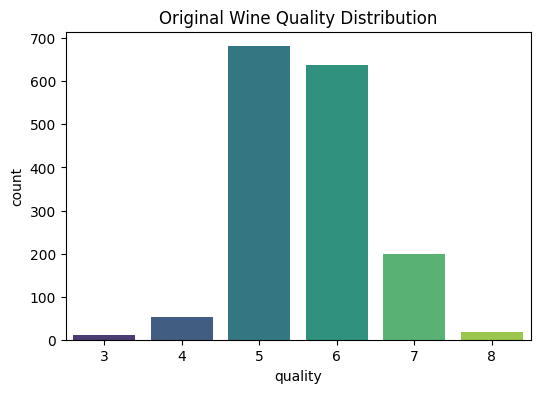

After SMOTE: Counter({5: 681, 6: 681, 7: 681, 4: 681, 8: 681, 3: 681})


/tmp/ipython-input-263769463.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_resampled, palette="crest")


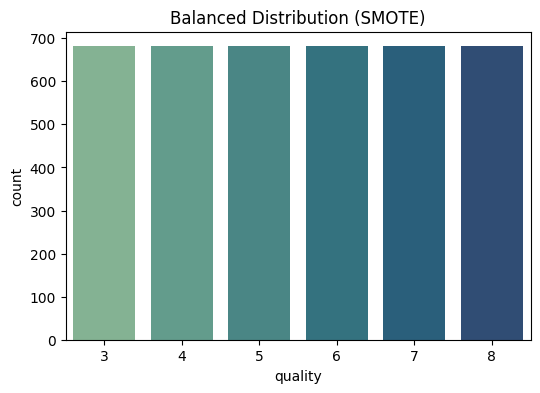

After Undersampling: Counter({3: 10, 4: 10, 5: 10, 6: 10, 7: 10, 8: 10})


/tmp/ipython-input-263769463.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_under, palette="rocket")


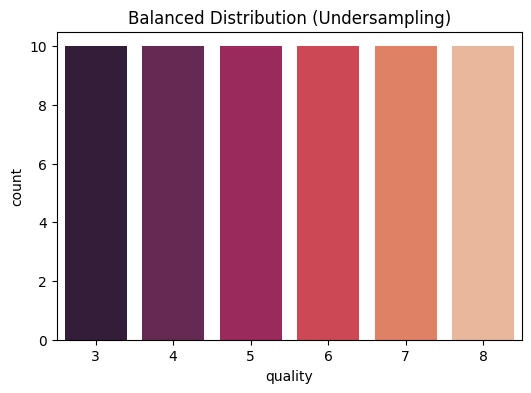

In [8]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Check original distribution
print("Original class distribution:", Counter(y))

plt.figure(figsize=(6,4))
sns.countplot(x=y, palette="viridis")
plt.title("Original Wine Quality Distribution")
plt.show()

# ===== Option A: SMOTE Oversampling =====
smote = SMOTE(random_state=42, k_neighbors=5)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)
print("After SMOTE:", Counter(y_resampled))

plt.figure(figsize=(6,4))
sns.countplot(x=y_resampled, palette="crest")
plt.title("Balanced Distribution (SMOTE)")
plt.show()

# ===== Option B: Random Undersampling =====
undersampler = RandomUnderSampler(random_state=42)
X_under, y_under = undersampler.fit_resample(X_scaled, y)
print("After Undersampling:", Counter(y_under))

plt.figure(figsize=(6,4))
sns.countplot(x=y_under, palette="rocket")
plt.title("Balanced Distribution (Undersampling)")
plt.show()

# ===== Save SMOTE-balanced dataset for model training =====
np.save("X_smote.npy", X_resampled)
np.save("y_smote.npy", y_resampled)

# (Optional) save undersampled too
np.save("X_under.npy", X_under)
np.save("y_under.npy", y_under)


Saving

In [9]:
import numpy as np
import joblib

# Save scaled features and target
np.save('X_scaled.npy', X_scaled)
np.save('y.npy', y)

# Save the fitted scaler for future use
joblib.dump(scaler, 'Data_Preprocessed.save')


['Data_Preprocessed.save']

In [10]:
# Combine scaled features and target column
processed_df = pd.DataFrame(X_scaled, columns=X.columns)
processed_df['quality'] = y  # Add target back

# Save to CSV
processed_df.to_csv('preprocessed_wine_data.csv', index=False)
